In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from autoeq.frequency_response import FrequencyResponse
from autoeq.peq import LowShelf

In [5]:
DIR_PATH = Path().resolve()
AUTOEQ_PATH = DIR_PATH.parent.parent.joinpath('AutoEq')

In [6]:
def remove_bass_shelf(target, fc, q, gain):
    name = target.name
    target = target.copy()
    target.name = name
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 4)
    target.plot(fig=fig, ax=ax, show_fig=False)
    shelf = LowShelf(target.frequency.copy(), 441000, fc=fc, q=q, gain=gain)
    target.raw -= shelf.fr
    target.plot(fig=fig, ax=ax, raw_plot_kwargs={'linestyle': '--', 'label': 'Bass shelf removed'})
    return target

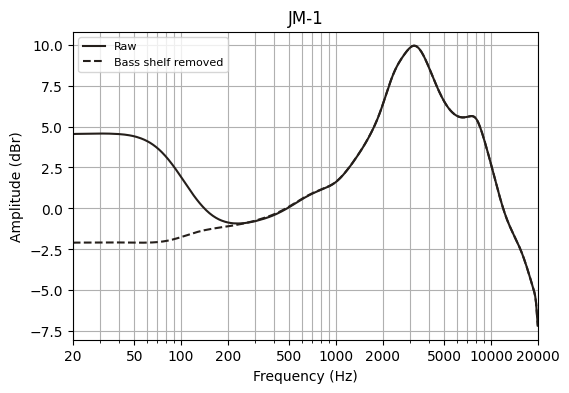

In [54]:
targets = [
    #{'file': 'Harman over-ear 2018.csv', 'fc': 105, 'q': 0.7759, 'gain': 6.6},
    {'file': 'JM-1.csv', 'fc': 105, 'q': 0.7759, 'gain': 6.6},
]
for target in targets:
    target = remove_bass_shelf(FrequencyResponse.read_csv(AUTOEQ_PATH.joinpath('targets', target['file'])), target['fc'], target['q'], target['gain'])
    target.write_csv(DIR_PATH.joinpath(f'{target.name} without bass.csv'))

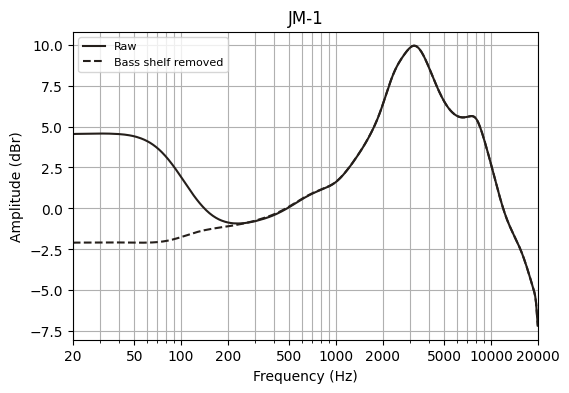

In [40]:
jm1 = remove_bass_shelf(FrequencyResponse.read_csv(AUTOEQ_PATH.joinpath('targets', 'JM-1.csv')), 105, 0.7759, 6.6)
jm1.write_csv(DIR_PATH.joinpath('JM-1 without bass.csv'))

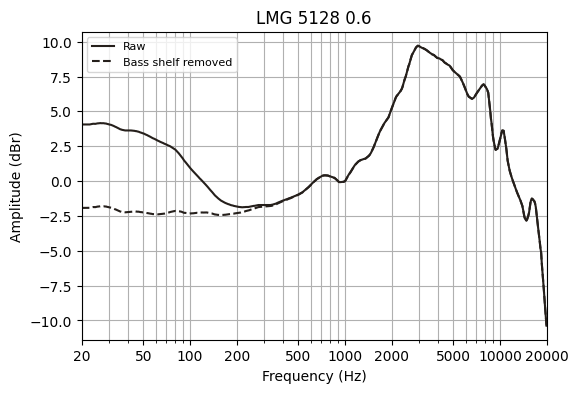

In [10]:
lmg = FrequencyResponse.read_csv(AUTOEQ_PATH.joinpath('targets', 'LMG 5128 0.6.csv'))
lmg = remove_bass_shelf(lmg, 105, 0.7, 6)
lmg.write_csv(DIR_PATH.joinpath('LMG 5128 0.6 without bass.csv'))
lmg.write_csv(AUTOEQ_PATH.joinpath('targets', 'LMG 5128 0.6 without bass.csv'))